<a href="https://colab.research.google.com/github/mohammedEhab2235/churn/blob/main/mini_project%2C_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.rename(columns={'Exited':'Churn'},inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


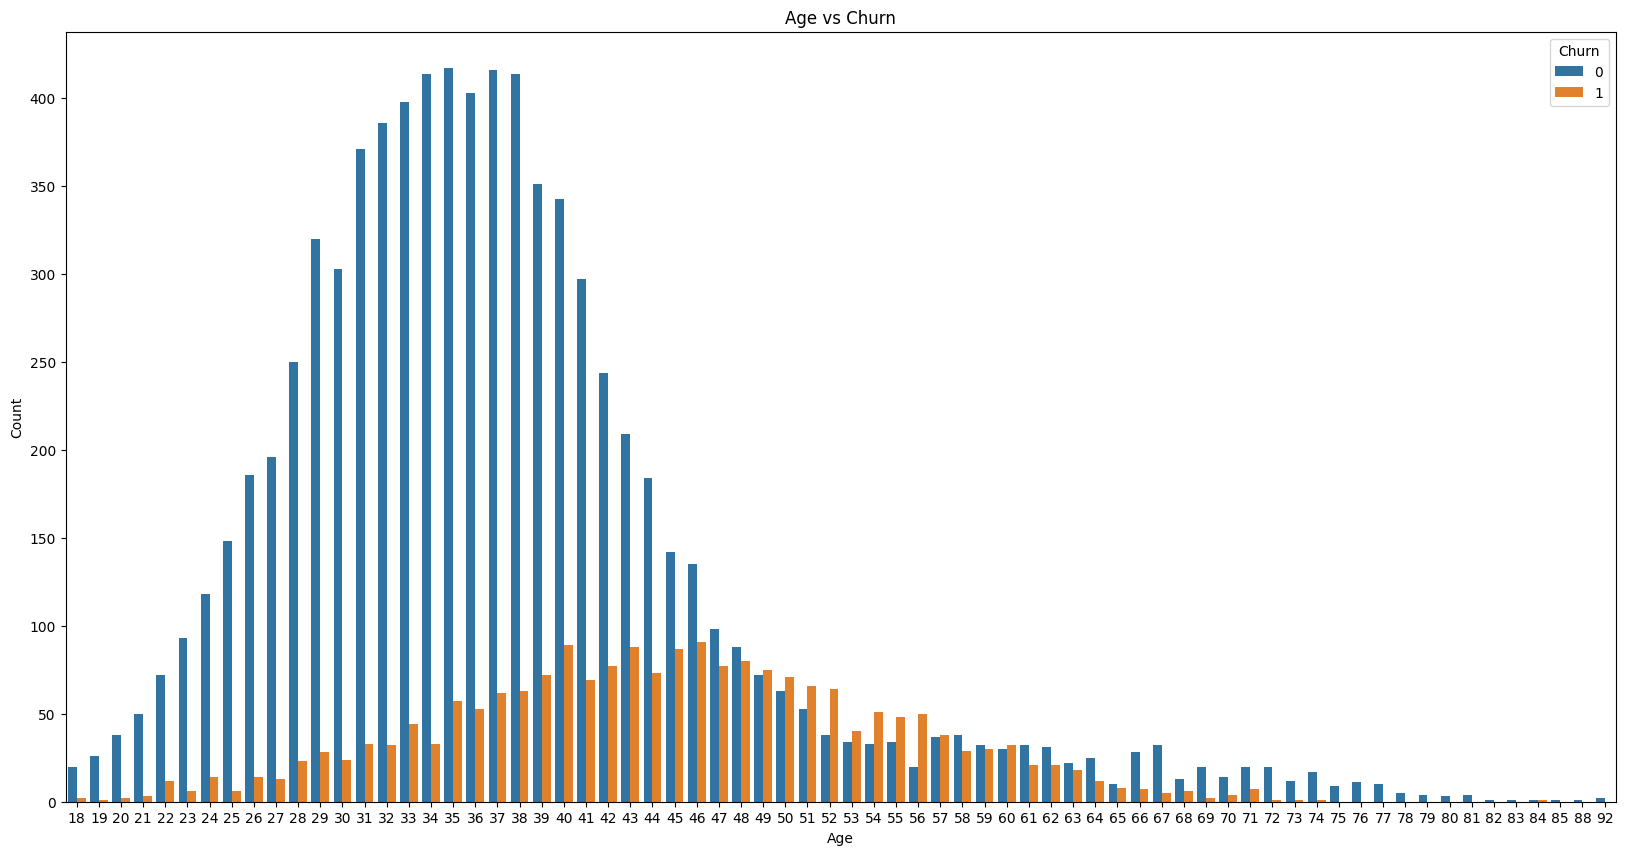

In [ ]:
# prompt: make a plot between age and churn

plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Churn',data=df)
plt.title('Age vs Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


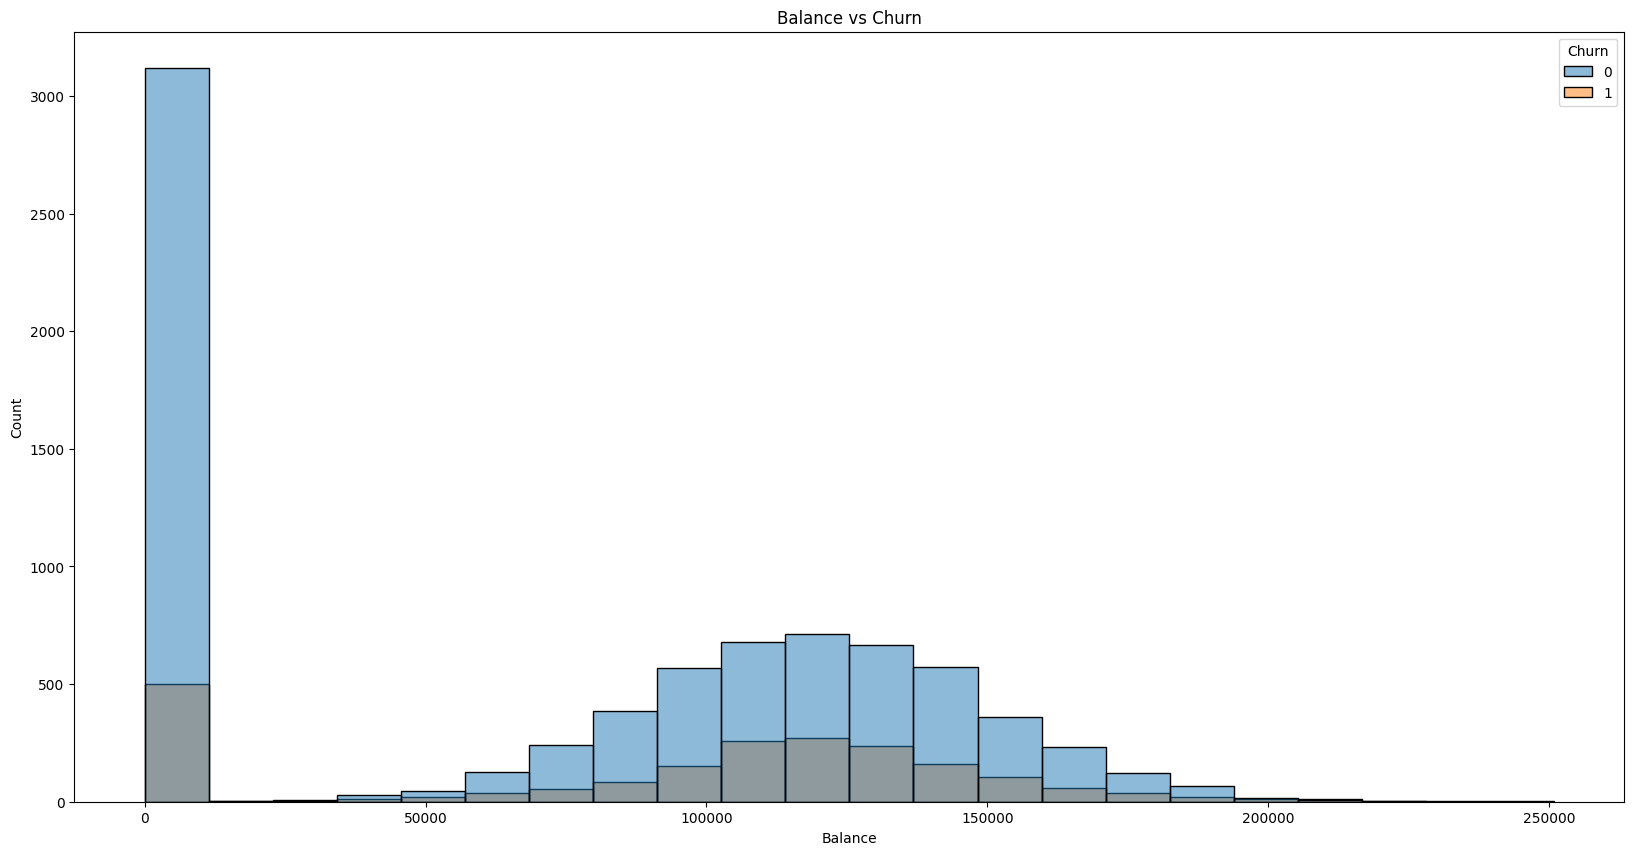

In [ ]:
# prompt: plot between balance and Exited

plt.figure(figsize=(20,10))
sns.histplot(x='Balance',hue='Churn',data=df)
plt.title('Balance vs Churn')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()


In [ ]:
lable_encoder = LabelEncoder()
df['Gender'] = lable_encoder.fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head(15)
#

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
5,6,15574012,Chu,645,1,44,8,113755.78,2,1,0,149756.71,1,False,True
6,7,15592531,Bartlett,822,1,50,7,0.00,2,1,1,10062.80,0,False,False
7,8,15656148,Obinna,376,0,29,4,115046.74,4,1,0,119346.88,1,True,False
8,9,15792365,He,501,1,44,4,142051.07,2,0,1,74940.50,0,False,False
9,10,15592389,H?,684,1,27,2,134603.88,1,1,1,71725.73,0,False,False


In [ ]:
features=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender','Geography_Spain']
x=df[features]
y=df['Exited']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

#the conf matrix shows how many the model predicted to the actual thing


In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

#rows shows the predicted model and colums show the actual

In [ ]:
print(pd.DataFrame(conf_matrix, index=[0, 1], columns=[0, 1]))
print(class_report)
print(accuracy)
#

      0    1
0  1549   58
1   221  172
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

0.8605


#shows the most effecting column on the model (importance function)

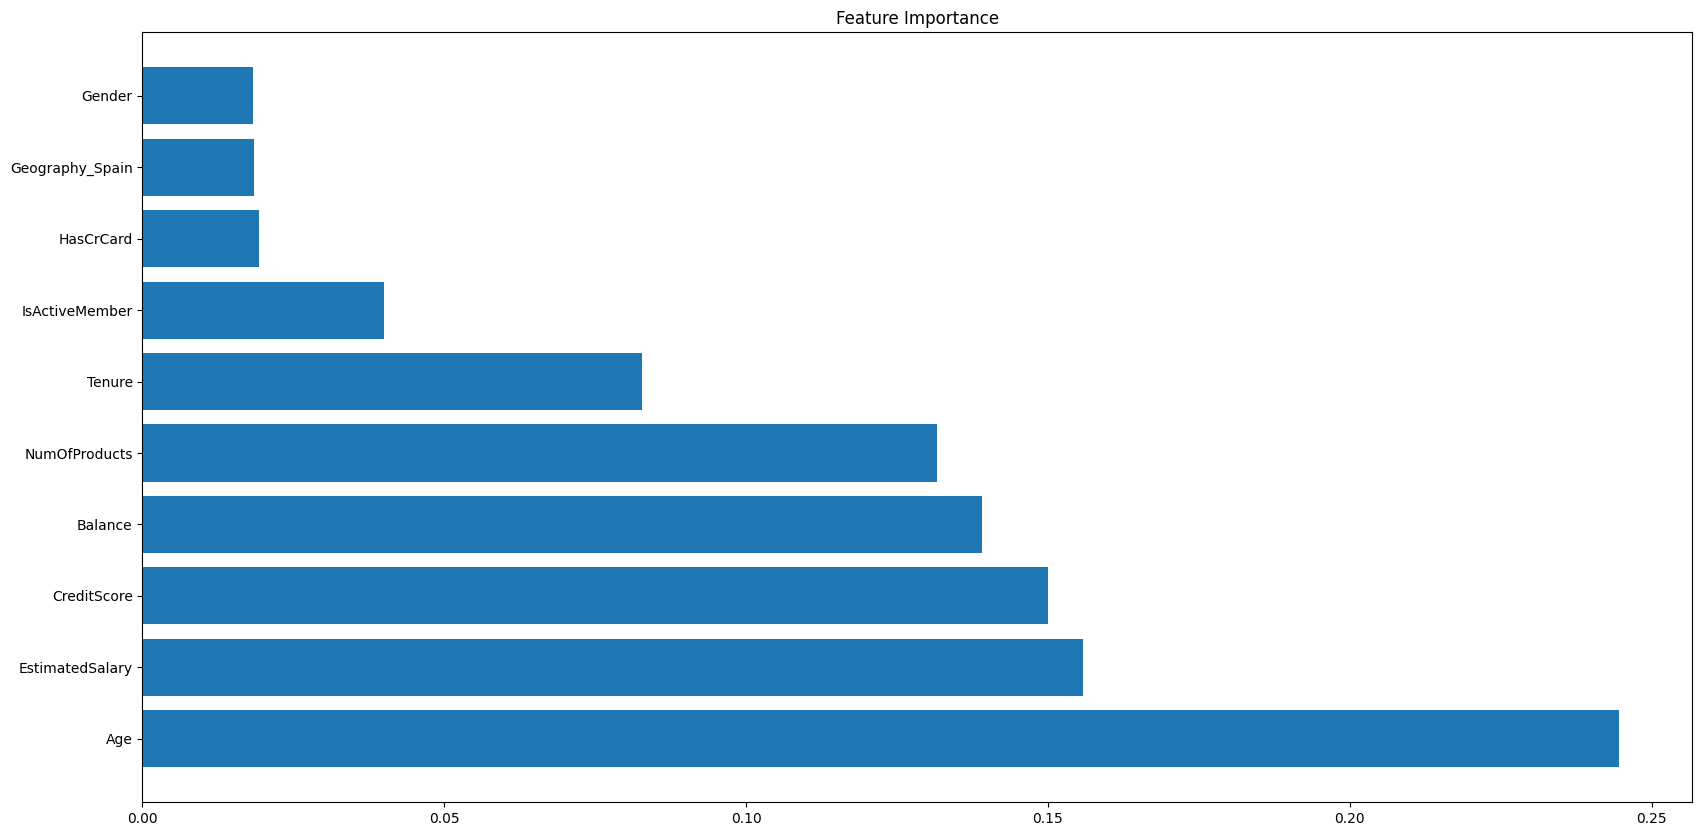

In [ ]:
importance=model.feature_importances_
indices=np.argsort(importance)[::-1]
names=[features[i] for i in indices]

plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(x_train.shape[1]),importance[indices])
plt.yticks(range(x_train.shape[1]),names)
plt.show()
#

In [ ]:
# prompt: build a model using k_nearest nighbors

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(x_test)

# Evaluate the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Confusion Matrix:")
print(pd.DataFrame(conf_matrix_knn, index=[0, 1], columns=[0, 1]))
print("\nKNN Classification Report:")
print(class_report_knn)
print("\nKNN Accuracy:", accuracy_knn)


KNN Confusion Matrix:
      0    1
0  1520   87
1   245  148

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.47       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000


KNN Accuracy: 0.834


In [ ]:
# prompt: build a model using linear regression

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg_model.predict(x_test)

# Evaluate the Logistic Regression model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression Confusion Matrix:")
print(pd.DataFrame(conf_matrix_logreg, index=[0, 1], columns=[0, 1]))
print("\nLogistic Regression Classification Report:")
print(class_report_logreg)
print("\nLogistic Regression Accuracy:", accuracy_logreg)


Logistic Regression Confusion Matrix:
      0   1
0  1557  50
1   330  63

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.56      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.77      2000


Logistic Regression Accuracy: 0.81
